In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

%matplotlib inline

print(f'sys.version: {sys.version}')

sys.version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]


In [2]:
def save_ani(episode, reward, frames, out_path='./results/'):
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    
    fig = plt.figure()
    plt.title(f'train episode: {episode}, reward: {reward}')
    plt.axis('off')

    im = plt.imshow(frames[0], animated=True)

    def update_fig(frame, *args):
        im.set_array(frame)
        return im,

    ani = animation.FuncAnimation(fig, update_fig, frames=frames[::5])
    ani.save(f'{out_path}train_episode_{episode}_reward_{reward}.gif', 
             writer='imagemagick',
             fps=50)

['train_episode_3_reward_805.npy', 'train_episode_95_reward_660.npy']


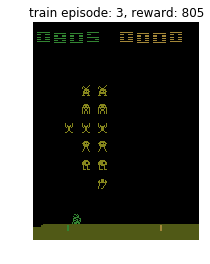

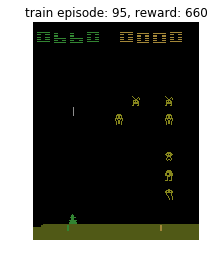

In [3]:
filenames = os.listdir('./train_stats')
print(filenames)

for filename in filenames:
    frames = np.load(f'./train_stats/{filename}')
    episode = int(filename.split('_')[2].split('.')[0])
    reward = int(filename.split('_')[4].split('.')[0])
    save_ani(episode, reward, frames)